# Classifying voices based on their features

Dataset Source: https://www.kaggle.com/datasets/primaryobjects/voicegender

This dataset consists of several acoustic properties that make up human sounds. In order to classify these voices correctly, three different classification algorithms will be used to train three models, and the models' accuracy will be compared to find the best possible one.

In this dataset, there are 21 features (including the target class). Here is a breakdown of each feature name, which was provided from the data source:

1. meanfreq: mean frequency (in kHz)

2. sd: standard deviation of frequency

3. median: median frequency (in kHz)

4. Q25: first quantile (in kHz)

5. Q75: third quantile (in kHz)

6. IQR: interquantile range (in kHz)

7. skew: skewness

8. kurt: kurtosis

9. sp.ent: spectral entropy

10. sfm: spectral flatness

11. centroid: frequency centroid (see specprop)

12. peakf: peak frequency (frequency with highest energy)

13. meanfun: average of fundamental frequency measured across acoustic signal

14. minfun: minimum fundamental frequency measured across acoustic signal

15. maxfun: maximum fundamental frequency measured across acoustic signal

16. meandom: average of dominant frequency measured across acoustic signal

17. mindom: minimum of dominant frequency measured across acoustic signal

18. maxdom: maximum of dominant frequency measured across acoustic signal

19. dfrange: range of dominant frequency measured across acoustic signal

20. modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range

21. label: male or female




important note: After some research into the origins of the dataset, I found out that the duration for each recording is standardized at 20 seconds, and the peak frequency is standardized at zero, which is why these features are not present in the dataset.

For this dataset, these will be the goals of my notebook:

1. Finding out the difference(s) that seperate male voices from female voices

2. Making sure the data is clean enough to not cause any errors or inaccuracies for training and testing

3. Coming up with a machine learning model that has the highest accuracy for classifying different voices

These are the following steps that will be taken:

1. Importing Libraries
2. Data Cleaning
3. Data Visualization
4. Feature Selection
5. Model Training
6. Model Testing
7. Conclusion

### Importing Libraries and reading dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn import metrics

In [2]:
df = pd.read_csv("voice.csv")

In [3]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
df.shape

(3168, 21)

### Data Cleaning


First: checking for duplicated values, as well as missing values

In [5]:
df[df.duplicated()]

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
298,0.213732,0.057705,0.242573,0.141701,0.257984,0.116283,2.113598,7.890927,0.859712,0.084934,...,0.213732,0.133667,0.028319,0.253968,0.818125,0.132812,4.164062,4.031250,0.229051,male
2403,0.212190,0.043190,0.215153,0.188957,0.245644,0.056687,1.862573,6.109790,0.877669,0.314398,...,0.212190,0.139942,0.047198,0.279070,1.925551,0.023438,15.609375,15.585938,0.121344,female


In [6]:
df.drop_duplicates()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [7]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [8]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [9]:
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

### Data Visualization

### 1. Distribution of classes

Target cannot be visualized while it is of type "object", so it will be temporarily converted

In [10]:
df['label'].replace('male','1',inplace = True)
df['label'].replace('female','0',inplace = True)
df.astype({'label': 'float'}).dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label       float64
dtype: object

([<matplotlib.patches.Wedge at 0x27cdd7bb2e0>,
 [Text(6.735557395310444e-17, 1.1, 'male'),
  Text(-2.0206672185931328e-16, -1.1, 'female')])

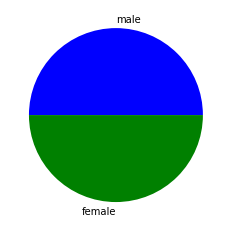

In [11]:
plt.pie(df['label'].value_counts(),colors = ['blue','green'],labels = ['male','female'])

Data is balanced, as both classes are of the same count

In [12]:
df['label'].replace('1','male',inplace = True)
df['label'].replace('0','female',inplace = True)
df.astype({'label': 'object'})

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


#### 2. Outlier Detection

<AxesSubplot:title={'center':'meanfreq'}, xlabel='label'>

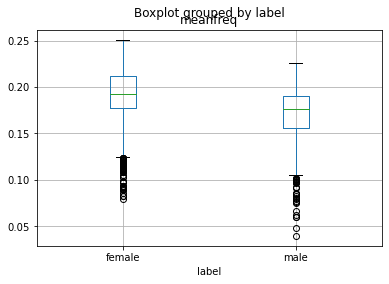

In [13]:
df.boxplot(column = 'meanfreq', by = 'label')

#### 3. distribution of mean frequencies versus mean fundamental frequencies

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


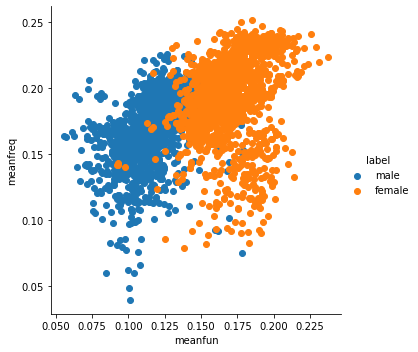

In [14]:
sns.FacetGrid(df, hue="label", size=5).map(plt.scatter, "meanfun", "meanfreq").add_legend()

### Feature Selection

In order to begin selecting the most relevant features, first it is important to decide on which feature selection method to use.

There are three feature selection methods:

1. Filter Methods

Filter methods measure, and compare the correlation of all features, and the ones with high correlation to each other are considered "redundant" as they do not improve the ability of the model to train. In a sense, filter methods attempt to maximize the model's ability to seperate classes and classify accordingly. Also, Filter methods work independently of machine learning algorithms.

2. Wrapper Methods

Wrapper methods evaluate features based on criterea related to the machine learning algorithm. Moreover, feature groups are evaluated based on their predictive accuracy with respect to the test data. To explain further, different feature groups are selected for training and testing on the model, and then their accuracy is evaluated. In the end, the feature group with the highest accuracy is the list of chosen features.

3. Embedded Methods

Embedded methods work similarly to the wrapper methods, from the prespective that features are selected based on the machine learning algorithm. However, they differ in the fact that the features are selected during the learning/training phase. Since the data is not required to be split into train-test splits, the method takes advantage of the wrapper method's ability to evaluate feature groups, while also being faster as it does not re-train the same features in different groups, but instead takes the features that perform well in the training phase.

Some important notes regarding each method:

* Filter methods pick large number of features, and therefore may be biased towards certain models.

* Wrapper methods do not take into consideration the correlation between the features in the feature groups, therefore it might skip important features in favour of finding two features that have high accuracy together.

* Although they are faster than wrapper methods, embedded methods will take more processing time than filter methods due to the feature groups being evaluated during training. 

Overall, the filter method seems to be the best method for this particular dataset, as the number of features is already low, and the correlation of features together is important to consider when all the features are related (statistical measures of frequencies) 

An important note to mention:

It is very important to only use the training set in correlation matrices. Because, if the whole dataset is used in the correlation matrix, this means that the training data is mixed with testing data. This would result in the model overfitting the data, because the training set is data it has already seen before.

In [15]:
#splitting features from label
x = df.iloc[:,0:-1]
y = df["label"]
#train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

<AxesSubplot:>

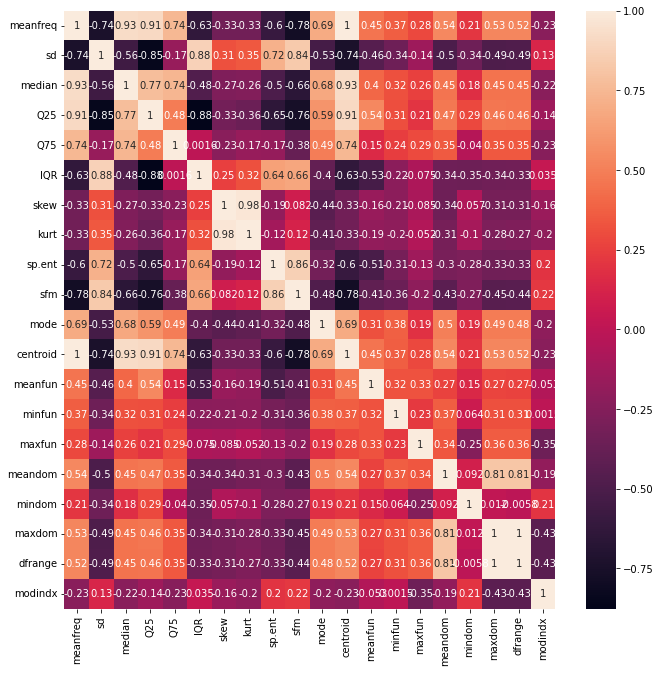

In [16]:
corrmat = x_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat,annot=True)

Since it is hard to eye-ball the highly correlated features, it is better to use a function with a threshold, instead.

In [17]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [18]:
correlated_features = correlation(x_train, 0.7)
correlated_features

{'IQR',
 'Q25',
 'Q75',
 'centroid',
 'dfrange',
 'kurt',
 'maxdom',
 'median',
 'sd',
 'sfm',
 'sp.ent'}

In [19]:
x_train.drop(labels = correlated_features,axis = 1,inplace = True)
x_test.drop(labels = correlated_features,axis = 1, inplace = True)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Model Training

### 1. Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
dtree = DecisionTreeClassifier(max_depth = 4,random_state= 42)
dtree.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(x_test, y_test)))

Accuracy on training set: 0.976
Accuracy on test set: 0.957


### 1.1 Decision Tree Learning Curve

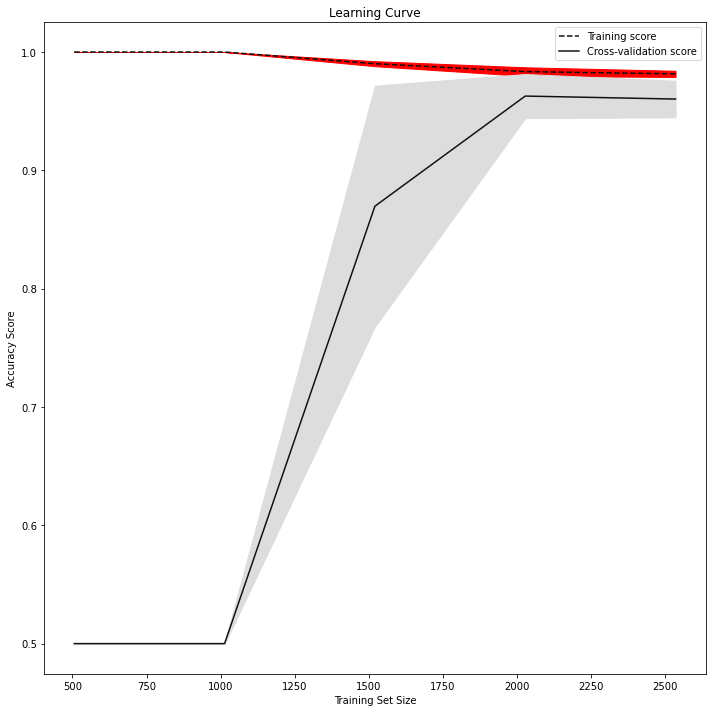

In [79]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=dtree,
    X=x,
    y=y,
    cv=5,
    scoring="accuracy",
    train_sizes = [0.2,0.4,0.6,0.8,1]
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

### 2. KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier

The next part took some trial and error...

Text(0, 0.5, 'Testing Accuracy')

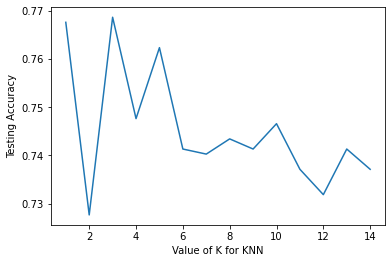

In [24]:
#trying different ranges for k range

k_range = range(1, 15)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

The best K value is 3

In [25]:
knn = KNeighborsClassifier(n_neighbors=2, metric='euclidean')
knn.fit(x_train, y_train)
print("Accuracy on test set: {:.3f}".format(knn.score(x_test, y_test)))

Accuracy on test set: 0.728


### 2.1 KNN Learning Curve

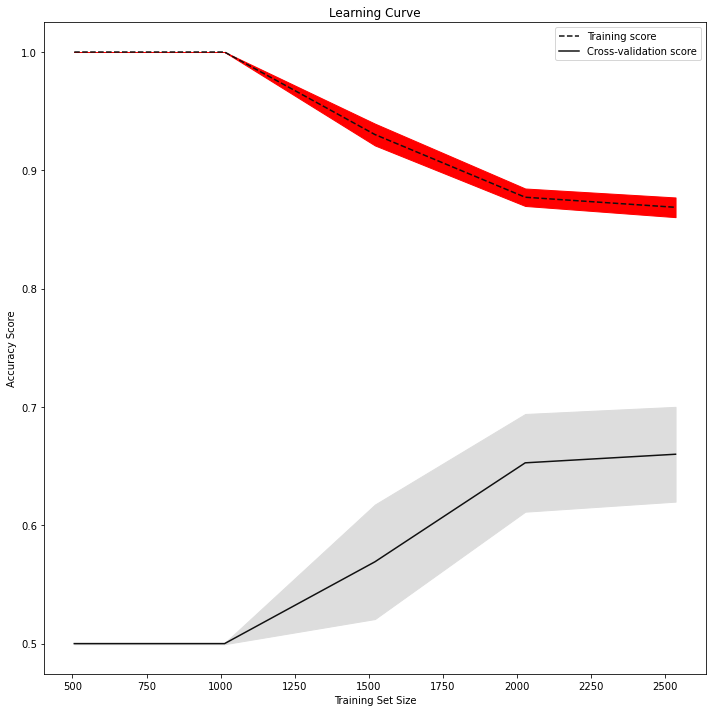

In [82]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=knn,
    X=x,
    y=y,
    cv=5,
    scoring="accuracy",
    train_sizes = [0.2,0.4,0.6,0.8,1]
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

### 3. Logistic Regression 

In [27]:
from sklearn.linear_model import LogisticRegression

In [133]:
model = LogisticRegression(C = 9, solver='lbfgs', max_iter=1000)
model = model.fit(x, y)

model.score(x, y)

0.9649621212121212

### 3.1 Logistic Regression Learning Curve


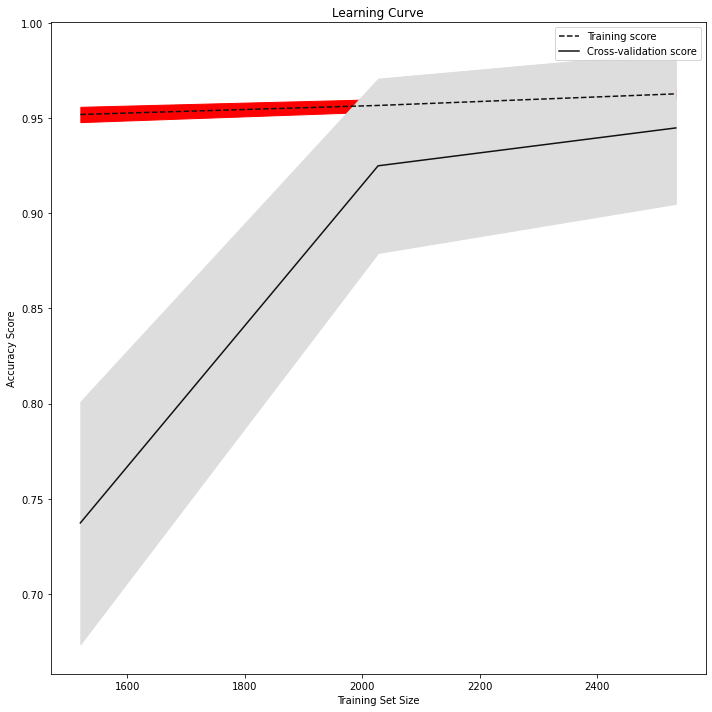

In [131]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=x,
    y=y,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    train_sizes = [0.2,0.4,0.6,0.8,1],
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

### Model Testing

### 1. Decision Tree Accuracy

In [30]:
print("Accuracy on test set: {:.3f}".format(dtree.score(x_test, y_test)))

Accuracy on test set: 0.957


### 1.1 Decision Tree Confusion Matrix

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
y_pred_cf = dtree.predict(x_test)
confusion = confusion_matrix(y_test, y_pred_cf)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[434  18]
 [ 23 476]]


### 1.2 Decision Tree Classification Report

In [33]:
from sklearn.metrics import classification_report

In [34]:
cf_rep = classification_report(y_test, y_pred_cf,
                            target_names=["female", "male"])

print(cf_rep)

              precision    recall  f1-score   support

      female       0.95      0.96      0.95       452
        male       0.96      0.95      0.96       499

    accuracy                           0.96       951
   macro avg       0.96      0.96      0.96       951
weighted avg       0.96      0.96      0.96       951



### 2.1 KNN Accuracy

In [35]:
print("Accuracy on test set: {:.3f}".format(knn.score(x_test, y_test)))

Accuracy on test set: 0.728


### 2.1 KNN Confusion Matrix

In [36]:
y_pred_cf = knn.predict(x_test)
confusion = confusion_matrix(y_test, y_pred_cf)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[403  49]
 [210 289]]


### 2.2 KNN Classification Report

In [37]:
cf_rep = classification_report(y_test, y_pred_cf,
                            target_names=["female", "male"])

print(cf_rep)

              precision    recall  f1-score   support

      female       0.66      0.89      0.76       452
        male       0.86      0.58      0.69       499

    accuracy                           0.73       951
   macro avg       0.76      0.74      0.72       951
weighted avg       0.76      0.73      0.72       951



### 3. Logistic Regression Accuracy

In [38]:
print ("Accuracy :", metrics.accuracy_score(y, model.predict(x)))

Accuracy : 0.9100378787878788


### 3.1 Logistic Regression Confusion Matrix

In [39]:
print ("Confusion matrix :",metrics.confusion_matrix(y, model.predict(x)))

Confusion matrix : [[1355  229]
 [  56 1528]]


### 3.2 Logistic Regression Classification Report

In [40]:
print ("classification report :", metrics.classification_report(y, model.predict(x)))

classification report :               precision    recall  f1-score   support

      female       0.96      0.86      0.90      1584
        male       0.87      0.96      0.91      1584

    accuracy                           0.91      3168
   macro avg       0.91      0.91      0.91      3168
weighted avg       0.91      0.91      0.91      3168



### Conclusion


Based on these results: Logistic Regression was the most accurate algorithm in terms of accuracy, confusion matrix score, and classification report scores.